In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
import constant

/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_31912/2536759976.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i].set_ylim([0, 2000])
/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_31912/2536759976.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i].set_ylim([0, 2000])


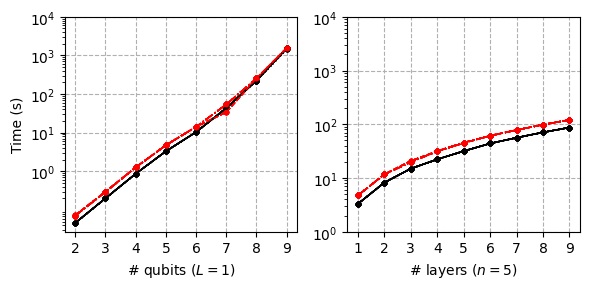

In [53]:
layers = list(range(1, 10))
qubits = list(range(2, 10))

# times_cad113_vs_layers = np.loadtxt(f"./data/time/cad113/times_2qubit_{num_layer}layer_g2gn.txt")
# times_cad113_vs_qubits = np.loadtxt(f"./data/time/cad113/times_{num_qubits}qubit_1layer_g2gn.txt")
# times_wonder40_vs_layers = np.loadtxt(f"./data/time/wonder40/times_2qubit_{num_layer}layer_g2gn.txt")
# times_wonder40_vs_qubits = np.loadtxt(f"./data/time/wonder40/times_{num_qubits}qubit_1layer_g2gn.txt")

# num_qubits_edpss = [num_qubits_cad113 ** 2 * power_cad113, num_qubits_wonder40 ** 2 * power_wonder40]
fig, axs = plt.subplots(1,2, figsize=(6, 3))

for i, computer in enumerate(['cad113']):
    # ---- qubits ----
    timess = []
    for j, num_qubits in enumerate(qubits):
        times = np.loadtxt(f"../data/time/{computer}/times_{num_qubits}qubit_1layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_qubits in enumerate(qubits):
        for k, optimizer in enumerate(constant.optimizers_name):     
            
            axs[i*2].plot(qubits, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[i*2].set_xticks(qubits)
            axs[i*2].set_xticklabels(qubits)

    # ---- layers ----
    timess = []
    for j, num_layers in enumerate(layers):
        times = np.loadtxt(f"../data/time/{computer}/times_5qubit_{num_layers}layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_layers in enumerate(layers):
        for k, optimizer in enumerate(constant.optimizers_name):     
            axs[i*2 + 1].plot(layers, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[i*2 + 1].set_xticks(layers)
            axs[i*2 + 1].set_xticklabels(layers)
    
    

yticks = [1, 10, 100, 1000, 10000]
yticklabels = ['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$']


for i in range(0, 2):
    axs[i].set_ylabel('Time (s)')
    axs[i].set_yscale('log')
    axs[i].set_ylim([0, 2000])  
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(yticklabels)
    # if i != 0:
    #     axs[i].set_yticklabels([])
for i in range(0, 2):
    if i % 2 == 1:
        axs[i].set_xlabel(rf'# layers $(n=5)$')
    else:
        axs[i].set_xlabel(rf'# qubits $(L=1)$')
    axs[i].grid(linestyle='--')
axs[1].set_ylabel('')
# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.tight_layout()
plt.savefig('../data/images/times2.svg', bbox_inches='tight')

In [37]:
10*(timess)

array([[  33.04 ,   82.183,  149.401,  222.688,  316.563,  438.709,
         562.47 ,  706.913,  869.412],
       [  32.981,   82.192,  149.065,  221.082,  316.356,  439.489,
         560.755,  706.581,  869.888],
       [  47.321,  116.946,  207.905,  315.07 ,  446.125,  611.594,
         781.166,  982.267, 1208.035],
       [  47.338,  116.765,  197.306,  316.374,  456.297,  606.994,
         782.008,  983.245, 1207.567],
       [  47.667,  117.104,  197.485,  312.091,  454.685,  615.387,
         780.611,  982.747, 1207.813]])